# To normalize and standardize all the features in the NBA data, as well as create a validation set.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import median
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

## Load the data

In [2]:
# load the data
df = pd.read_csv('clean_data.csv')

In [3]:
# check out its appearance
df.head()

,DISPLAY_FIRST_LAST,SCHOOL,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,TEAM_NAME,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,PIE,current_avg_salary,age,year_played
0,Steven Adams,Pittsburgh,83.0,265.0,7,12,Center,Pelicans,2013,1,12,8.1,2.0,9.2,0.093,2.153090e+07,28,7
1,Bam Adebayo,Kentucky,81.0,255.0,3,13,Center-Forward,Heat,2017,1,14,19.2,5.4,9.5,0.167,2.620383e+07,24,3
2,LaMarcus Aldridge,Texas,83.0,250.0,14,12,Center-Forward,Spurs,2006,1,2,13.7,1.7,4.5,0.096,5.549880e+05,36,14
3,Grayson Allen,Duke,76.0,198.0,2,3,Guard,Grizzlies,2018,1,21,9.5,2.1,3.1,0.085,4.147610e+06,25,2
4,Jarrett Allen,Texas,83.0,243.0,3,31,Center,Cavaliers,2017,1,22,12.9,1.6,9.9,0.147,5.807674e+06,23,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  353 non-null    object 
 1   SCHOOL              353 non-null    object 
 2   HEIGHT              353 non-null    float64
 3   WEIGHT              353 non-null    float64
 4   SEASON_EXP          353 non-null    int64  
 5   JERSEY              353 non-null    int64  
 6   POSITION            353 non-null    object 
 7   TEAM_NAME           353 non-null    object 
 8   DRAFT_YEAR          353 non-null    object 
 9   DRAFT_ROUND         353 non-null    object 
 10  DRAFT_NUMBER        353 non-null    object 
 11  PTS                 353 non-null    float64
 12  AST                 353 non-null    float64
 13  REB                 353 non-null    float64
 14  PIE                 353 non-null    float64
 15  current_avg_salary  353 non-null    float64
 16  age     

##  Create dummy or indicator features for categorical variables 

In [5]:
school_counts = df['SCHOOL'].value_counts()
school_counts

Kentucky             20
Duke                 17
UCLA                 11
North Carolina       10
Texas                 8
                     ..
New Mexico State      1
Western Kentucky      1
Edgewater HS (FL)     1
Estudiantes           1
Maccabi Tel Aviv      1
Name: SCHOOL, Length: 153, dtype: int64

In [6]:
# create dummy for school, there are too many shools
# set for school less that 6 to others
school_mask = df['SCHOOL'].isin(school_counts[school_counts < 6].index)
df['SCHOOL'][school_mask] = 'Other'

<ipython-input-6-75e850b66e03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOL'][school_mask] = 'Other'


In [7]:
df['SCHOOL'].value_counts()

Other             254
Kentucky           20
Duke               17
UCLA               11
North Carolina     10
Texas               8
Kansas              7
Washington          7
Indiana             7
Arizona             6
Villanova           6
Name: SCHOOL, dtype: int64

In [8]:
# create dummy for school
df = pd.get_dummies(df, columns=['SCHOOL'],               
                prefix='SCHOOL')

In [9]:
school_mask

0       True
1      False
2      False
3      False
4      False
       ...  
348     True
349     True
350     True
351    False
352     True
Name: SCHOOL, Length: 353, dtype: bool

In [10]:
position_counts = df['POSITION'].value_counts()
position_counts

Guard             130
Forward            89
Guard-Forward      38
Forward-Center     29
Center             28
Center-Forward     20
Forward-Guard      19
Name: POSITION, dtype: int64

In [11]:
# create dummy for position
df = pd.get_dummies(df, columns=['POSITION'],               
               drop_first=True, prefix='POS')

In [12]:
# create dummy for draft_YEAR
df = pd.get_dummies(df, columns=['DRAFT_YEAR'],               
                prefix='DRAFT_YEAR')

In [13]:
# create dummy for draft_round
df = pd.get_dummies(df, columns=['DRAFT_ROUND'],               
                prefix='DRAFT_ROUND')

In [14]:
# create dummy for draft_number
df = pd.get_dummies(df, columns=['DRAFT_NUMBER'],               
                prefix='DRAFT#')

In [15]:
# create dummy for draft_number
df = pd.get_dummies(df, columns=['TEAM_NAME'],               
                prefix='TEAM')

In [16]:
# create dummy for draft_number
df = pd.get_dummies(df, columns=['JERSEY'],               
                prefix='JERSEY')
df.columns

Index(['DISPLAY_FIRST_LAST', 'HEIGHT', 'WEIGHT', 'SEASON_EXP', 'PTS', 'AST',
       'REB', 'PIE', 'current_avg_salary', 'age',
       ...
       'JERSEY_46', 'JERSEY_51', 'JERSEY_54', 'JERSEY_55', 'JERSEY_67',
       'JERSEY_77', 'JERSEY_81', 'JERSEY_88', 'JERSEY_95', 'JERSEY_99'],
      dtype='object', length=190)

In [17]:
df.shape

(353, 190)

## Standardize the magnitude of numeric features using a scaler

In [18]:
# Subset the numeric features
df_numneric = df[['HEIGHT', 'WEIGHT', 'SEASON_EXP', 'PTS', 'AST', 'REB', 'PIE',
                  'current_avg_salary', 'age', 'year_played']]


In [19]:
df_numneric.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played
0,83.0,265.0,7,8.1,2.0,9.2,0.093,2.153090e+07,28,7
1,81.0,255.0,3,19.2,5.4,9.5,0.167,2.620383e+07,24,3
2,83.0,250.0,14,13.7,1.7,4.5,0.096,5.549880e+05,36,14
3,76.0,198.0,2,9.5,2.1,3.1,0.085,4.147610e+06,25,2
4,83.0,243.0,3,12.9,1.6,9.9,0.147,5.807674e+06,23,3


In [20]:
# Making a Scaler object
scaler = MinMaxScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(df_numneric)

In [21]:
names = ['HEIGHT', 'WEIGHT', 'SEASON_EXP', 'PTS', 'AST', 'REB', 'PIE',
                  'current_avg_salary', 'age', 'year_played']
scaled_df = pd.DataFrame(scaled_df, columns=names) 

In [22]:
scaled_df.head()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played
0,0.70,0.669065,0.411765,0.254717,0.178571,0.647887,0.710784,0.483848,0.380952,0.411765
1,0.60,0.597122,0.176471,0.603774,0.482143,0.669014,0.892157,0.589345,0.190476,0.176471
2,0.70,0.561151,0.823529,0.430818,0.151786,0.316901,0.718137,0.010294,0.761905,0.823529
3,0.35,0.187050,0.117647,0.298742,0.187500,0.218310,0.691176,0.091401,0.238095,0.117647
4,0.70,0.510791,0.176471,0.405660,0.142857,0.697183,0.843137,0.128879,0.142857,0.176471


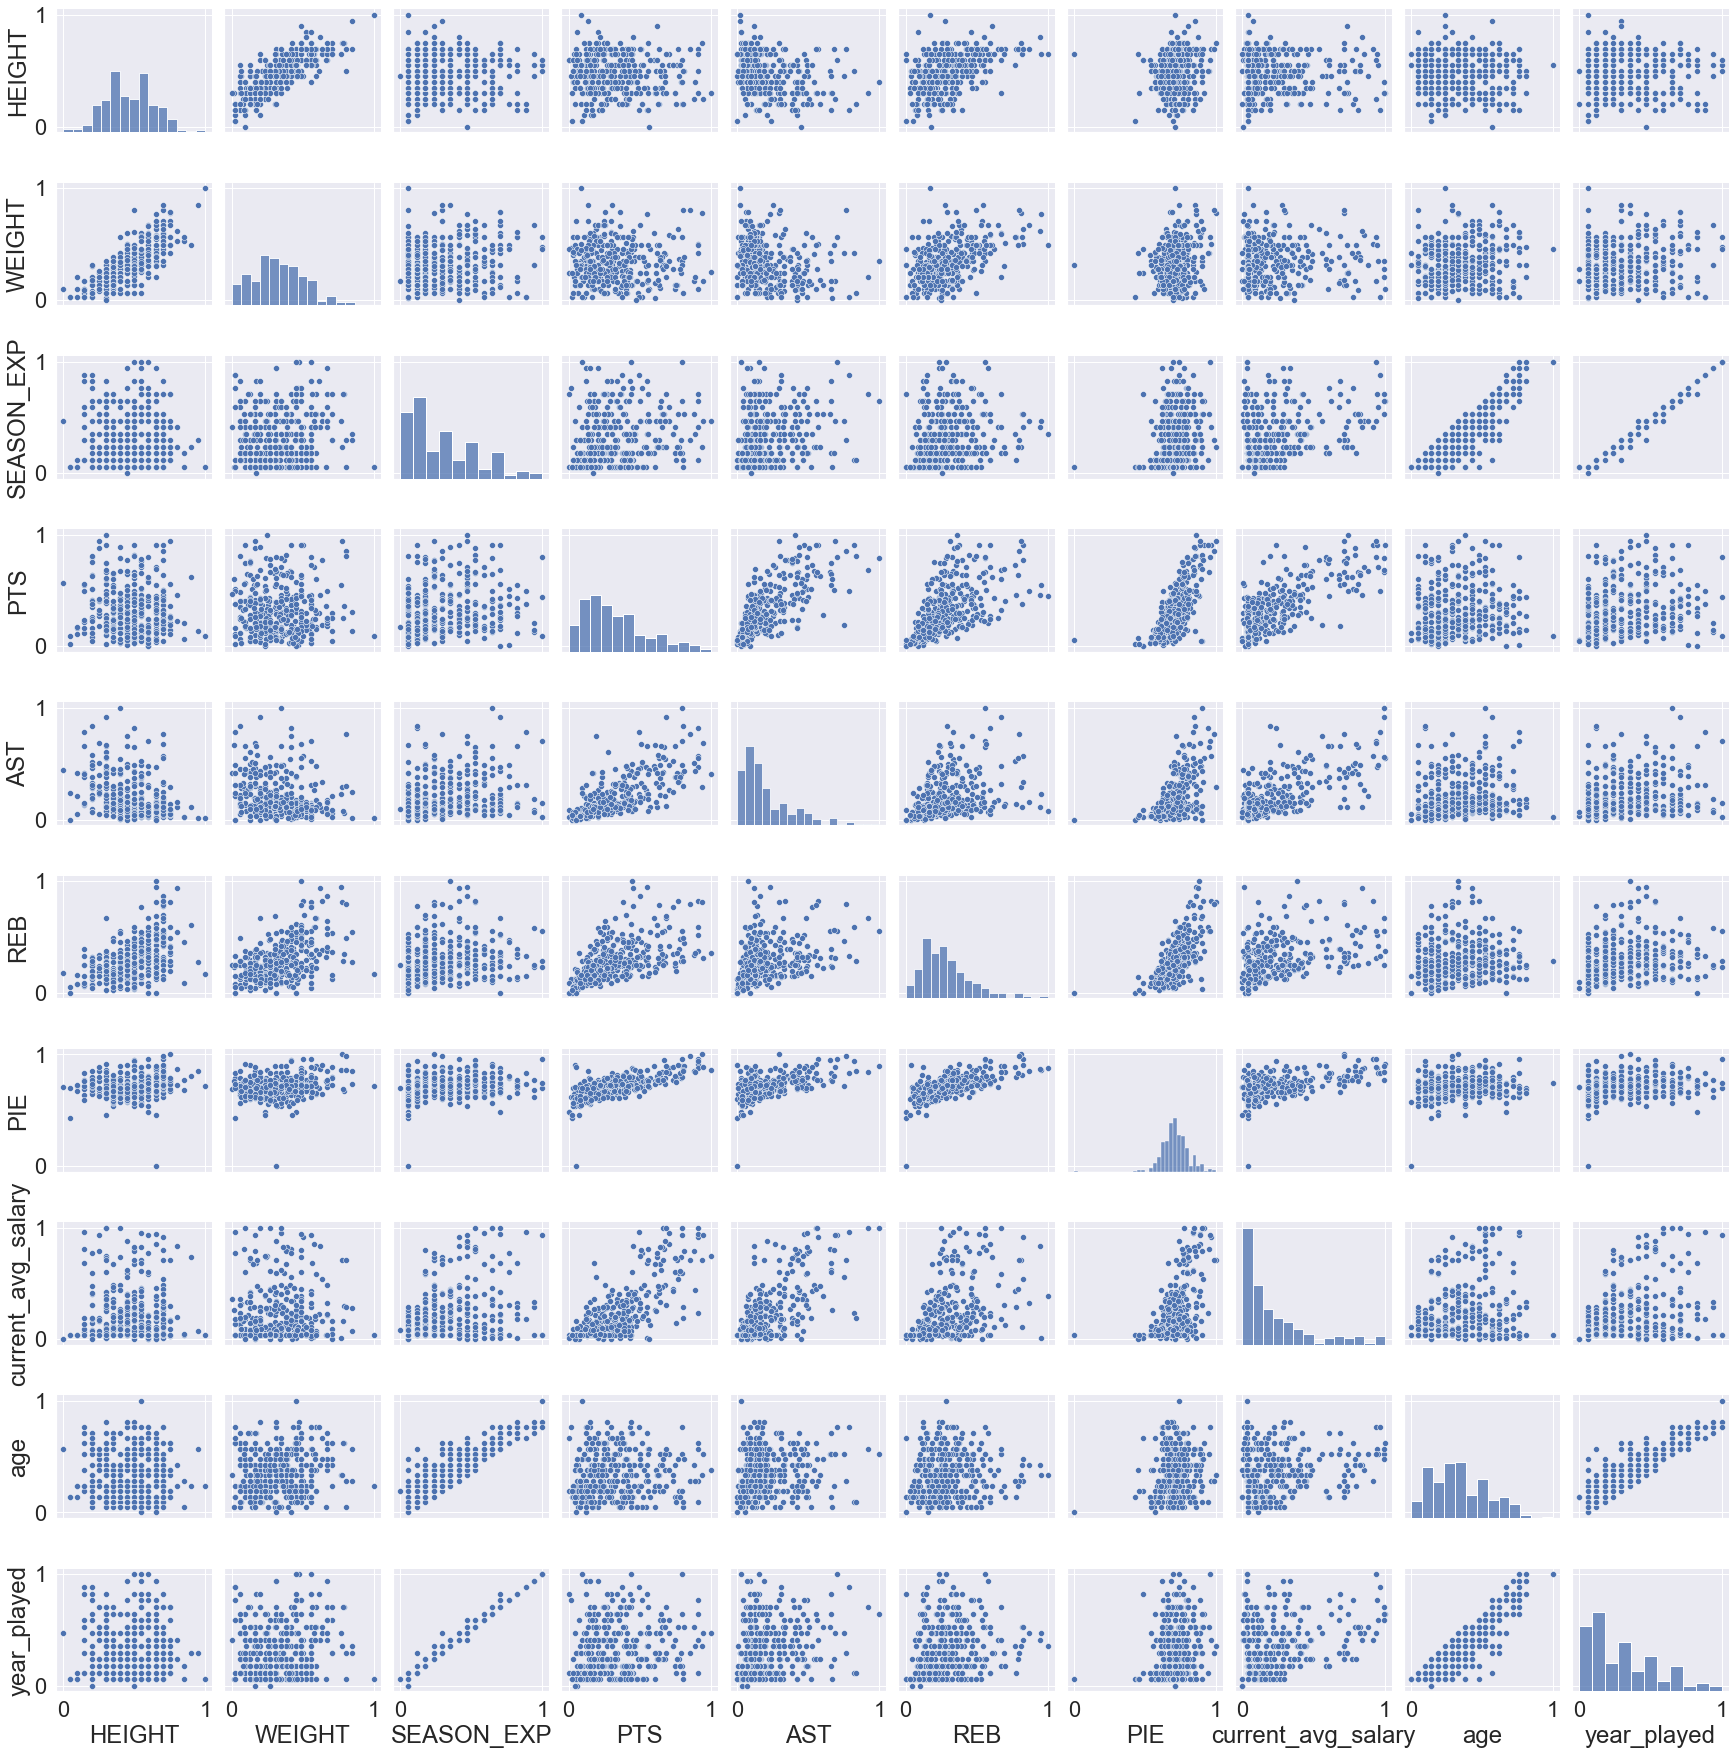

In [23]:
# after scaling Make a pairplot of the data
sns.set(font_scale=2, color_codes = True)
g = sns.pairplot(scaled_df)

In [24]:
# merge the scaled_df back to df
df[names] = scaled_df

In [25]:
df.head()

,DISPLAY_FIRST_LAST,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
0,Steven Adams,0.70,0.669065,0.411765,0.254717,0.178571,0.647887,0.710784,0.483848,0.380952,...,0,0,0,0,0,0,0,0,0,0
1,Bam Adebayo,0.60,0.597122,0.176471,0.603774,0.482143,0.669014,0.892157,0.589345,0.190476,...,0,0,0,0,0,0,0,0,0,0
2,LaMarcus Aldridge,0.70,0.561151,0.823529,0.430818,0.151786,0.316901,0.718137,0.010294,0.761905,...,0,0,0,0,0,0,0,0,0,0
3,Grayson Allen,0.35,0.187050,0.117647,0.298742,0.187500,0.218310,0.691176,0.091401,0.238095,...,0,0,0,0,0,0,0,0,0,0
4,Jarrett Allen,0.70,0.510791,0.176471,0.405660,0.142857,0.697183,0.843137,0.128879,0.142857,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(353, 190)

In [27]:
df = df.set_index('DISPLAY_FIRST_LAST')
df

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,PIE,current_avg_salary,age,year_played,...,JERSEY_46,JERSEY_51,JERSEY_54,JERSEY_55,JERSEY_67,JERSEY_77,JERSEY_81,JERSEY_88,JERSEY_95,JERSEY_99
DISPLAY_FIRST_LAST,,,,,,,,,,,,,,,,,,,,,
Steven Adams,0.70,0.669065,0.411765,0.254717,0.178571,0.647887,0.710784,0.483848,0.380952,0.411765,...,0,0,0,0,0,0,0,0,0,0
Bam Adebayo,0.60,0.597122,0.176471,0.603774,0.482143,0.669014,0.892157,0.589345,0.190476,0.176471,...,0,0,0,0,0,0,0,0,0,0
LaMarcus Aldridge,0.70,0.561151,0.823529,0.430818,0.151786,0.316901,0.718137,0.010294,0.761905,0.823529,...,0,0,0,0,0,0,0,0,0,0
Grayson Allen,0.35,0.187050,0.117647,0.298742,0.187500,0.218310,0.691176,0.091401,0.238095,0.117647,...,0,0,0,0,0,0,0,0,0,0
Jarrett Allen,0.70,0.510791,0.176471,0.405660,0.142857,0.697183,0.843137,0.128879,0.142857,0.176471,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,0.40,0.093525,0.294118,0.330189,0.455357,0.323944,0.774510,0.195602,0.428571,0.294118,...,0,0,0,1,0,0,0,0,0,0
Thaddeus Young,0.55,0.453237,0.764706,0.383648,0.392857,0.457746,0.803922,0.310838,0.619048,0.764706,...,0,0,0,0,0,0,0,0,0,0
Trae Young,0.20,0.057554,0.117647,0.808176,0.839286,0.288732,0.852941,0.192966,0.095238,0.117647,...,0,0,0,0,0,0,0,0,0,0


# Split into testing and training datasets

## Split the datasets with all the data

In [28]:
train, test = train_test_split(df, test_size=0.2)

In [29]:
train.shape

(282, 189)

In [30]:
test.shape

(71, 189)

In [31]:
train.to_csv (r'C:/Users/Nick/Documents/GitHub/Data-Science-Capstone-Two/nba_player_salary/notebooks/train.csv', index = False, header=True)
test.to_csv (r'C:/Users/Nick/Documents/GitHub/Data-Science-Capstone-Two/nba_player_salary/notebooks/test.csv', index = False, header=True)

## Separate the datasets into Star players and non star players

In the pervious exploratory data analyze, I noticed salary between NBA player are very unbalanced. Those players have high salary are star player. And their salary may be only determined by their perfomance on the course. It could affected by the player's popularity and non-game issues. Therefore, I am going the to separate the data into star palyerers and non star palyers. 

In [32]:
# Since the distribution of the salary is right skewed. I am going 90% confidence interval to separate the data
# Within 90% is non-star player, outside of 90% is star player
df_star = df[(np.abs(stats.zscore(df['current_avg_salary'])) > 1.645 )]
df_non_star = df[(np.abs(stats.zscore(df['current_avg_salary'])) <1.645 )]

In [33]:
df_star.shape

(36, 189)

In [34]:
df_non_star.shape

(317, 189)

In [42]:
3241510 / (df_non_star['current_avg_salary'].mean() * 44393664.0)

0.4606774161907907

In [35]:
train_star, test_star = train_test_split(df_star, test_size=0.2)
train_non_star, test_non_star = train_test_split(df_non_star, test_size=0.2)

In [37]:
df_non_star['current_avg_salary'].mean()

0.15850006793542815

In [36]:
train_star.to_csv (r'C:/Users/Nick/Documents/GitHub/Data-Science-Capstone-Two/nba_player_salary/notebooks/train_star.csv', index = False, header=True)
test_star.to_csv (r'C:/Users/Nick/Documents/GitHub/Data-Science-Capstone-Two/nba_player_salary/notebooks/test_star.csv', index = False, header=True)
train_non_star.to_csv (r'C:/Users/Nick/Documents/GitHub/Data-Science-Capstone-Two/nba_player_salary/notebooks/train_non_star.csv', index = False, header=True)
test_non_star.to_csv (r'C:/Users/Nick/Documents/GitHub/Data-Science-Capstone-Two/nba_player_salary/notebooks/test_non_star.csv', index = False, header=True)